In [1]:
from google.cloud import bigquery
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from tqdm import tqdm
from imblearn.over_sampling import SMOTE

from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Flatten
from sklearn.metrics import precision_score, recall_score, f1_score
from tqdm import tqdm

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, auc, classification_report

E:\Anaconda\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.25.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Train

In [2]:
train_processed_data_expanded = pd.read_csv('./output/scaled_train_data.csv')
# train_processed_data_expanded = train_processed_data_expanded.drop('Unnamed: 0', axis=1)

train_processed_data_expanded

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,encoded_tags
0,0.428620,1.000000,0.509812,0.000000e+00,8.906781e-07,0.000000,0.000000,0.509813,0.000001,2.486586e-06,...,0.0,9.179891e-05,0.022490,0.680028,1.000000,0.459038,6.565172e-07,8.784210e-09,0.000003,184
1,0.578240,0.999839,0.016088,6.101171e-03,3.595742e-01,0.000223,0.000125,0.016082,0.037998,6.038352e-05,...,1.0,5.081934e-03,0.039148,0.764455,0.000006,0.019570,2.624302e-01,0.000000e+00,0.000404,141
2,0.467841,0.996626,0.002890,0.000000e+00,0.000000e+00,0.000000,0.000000,0.002891,0.000000,4.092086e-04,...,0.0,1.040388e-04,0.028460,0.859879,0.242375,0.361443,3.157241e-02,6.552889e-06,0.000009,194
3,0.322503,0.989857,0.023677,1.015950e-06,7.954423e-01,0.412684,0.127934,0.015942,0.116336,6.150468e-05,...,0.0,2.787286e-04,0.033901,0.751330,0.049434,0.032961,4.568948e-02,1.137700e-03,0.000133,60
4,0.668298,1.000000,1.000000,6.884876e-09,1.000000e+00,0.000000,0.000000,1.000000,0.052762,7.937312e-07,...,0.0,1.587743e-08,0.000004,0.580702,0.000543,1.000000,8.483211e-01,1.026006e-03,0.000000,203
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5388330,0.668298,1.000000,1.000000,6.884876e-09,1.000000e+00,0.000000,0.000000,1.000000,0.052762,7.937312e-07,...,0.0,1.587743e-08,0.000004,0.580702,0.000543,1.000000,8.483211e-01,1.026006e-03,0.000000,203
5388331,0.668298,1.000000,1.000000,6.884876e-09,1.000000e+00,0.000000,0.000000,1.000000,0.052762,7.937312e-07,...,0.0,1.587743e-08,0.000004,0.580702,0.000543,1.000000,8.483211e-01,1.026006e-03,0.000000,203
5388332,0.668298,1.000000,1.000000,6.884876e-09,1.000000e+00,0.000000,0.000000,1.000000,0.052762,7.937312e-07,...,0.0,1.587743e-08,0.000004,0.580702,0.000543,1.000000,8.483211e-01,1.026006e-03,0.000000,203
5388333,0.293524,0.951149,0.006017,0.000000e+00,4.639506e-07,0.000000,0.000000,0.006017,0.000001,2.380474e-04,...,0.0,8.850077e-05,0.009008,0.996098,0.070973,0.048470,1.586959e-01,6.269141e-01,0.000092,142


In [3]:
test_processed_data_expanded = pd.read_csv('./output/scaled_test_data.csv')
# train_processed_data_expanded = train_processed_data_expanded.drop('Unnamed: 0', axis=1)

test_processed_data_expanded

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,encoded_tags
0,0.327324,0.999999,0.219593,1.000000e+00,4.189355e-01,0.000000,0.00000,0.219594,5.066213e-02,6.685087e-06,...,0.0,1.000000e+00,1.000000,0.998936,0.001565,0.153770,5.788697e-01,8.198362e-01,0.000041,124
1,0.327324,0.999999,0.219593,1.000000e+00,4.189355e-01,0.000000,0.00000,0.219594,5.066213e-02,6.685087e-06,...,0.0,1.000000e+00,1.000000,0.998936,0.001565,0.153770,5.788697e-01,8.198362e-01,0.000041,124
2,0.268661,0.999726,0.011852,0.000000e+00,4.806285e-08,0.000000,0.00000,0.011853,1.266585e-07,1.335921e-04,...,0.0,1.040388e-04,0.028460,0.859879,0.242375,0.361443,3.157241e-02,6.552889e-06,0.000009,194
3,0.428620,1.000000,0.509812,0.000000e+00,8.906781e-07,0.000000,0.00000,0.509813,1.013268e-06,2.486586e-06,...,0.0,9.179891e-05,0.022490,0.680028,1.000000,0.459038,6.565172e-07,8.784210e-09,0.000003,184
4,0.387329,0.612336,0.001213,0.000000e+00,0.000000e+00,0.000000,0.00000,0.001214,0.000000e+00,4.416578e-04,...,0.0,1.099598e-05,0.008395,0.300106,0.000536,0.002547,0.000000e+00,4.597327e-07,0.002466,214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1149097,0.296351,0.983435,0.160314,4.718805e-03,4.475495e-02,0.000000,0.00000,0.160314,1.199722e-03,9.322364e-06,...,1.0,4.734385e-03,0.001017,0.706279,0.000131,0.130509,3.088446e-02,4.192803e-07,0.000040,106
1149098,0.668298,1.000000,1.000000,6.884876e-09,1.000000e+00,0.000000,0.00000,1.000000,5.276211e-02,7.937312e-07,...,0.0,1.587743e-08,0.000004,0.580702,0.000543,1.000000,8.483211e-01,1.026006e-03,0.000000,203
1149099,0.387087,0.560943,0.115950,3.422385e-09,7.597835e-01,0.928852,0.00001,0.115950,1.000000e+00,3.698501e-06,...,1.0,2.448698e-08,0.000063,0.208585,0.000009,0.176432,8.838643e-01,1.165525e-05,0.000031,99
1149100,0.428620,1.000000,0.509812,0.000000e+00,8.906781e-07,0.000000,0.00000,0.509813,1.013268e-06,2.486586e-06,...,0.0,9.179891e-05,0.022490,0.680028,1.000000,0.459038,6.565172e-07,8.784210e-09,0.000003,184


In [4]:
# train_processed_data = pd.read_csv('./output/non_nan_balanced_data.csv')
val_processed_data_expanded = pd.read_csv('./output/scaled_val_data.csv') 
# processed_data_expanded = processed_data_expanded.drop('Unnamed: 0', axis=1)

val_processed_data_expanded

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,encoded_tags
0,0.566236,0.697855,0.009106,0.000000e+00,0.000000e+00,0.000000,0.000000,0.009106,0.000000,3.972780e-05,...,0.0,9.179891e-05,2.248993e-02,0.680028,1.000000,0.459038,6.565172e-07,8.784210e-09,0.000003,184
1,0.395012,0.999643,0.012381,0.000000e+00,9.524506e-04,0.000000,0.000000,0.012382,0.000697,1.076902e-04,...,0.0,4.002599e-05,6.486638e-03,0.730756,0.007162,0.013356,6.395042e-04,0.000000e+00,0.000405,180
2,0.668298,1.000000,1.000000,6.884876e-09,1.000000e+00,0.000000,0.000000,1.000000,0.052762,7.937312e-07,...,0.0,1.587743e-08,3.891505e-06,0.580702,0.000543,1.000000,8.483211e-01,1.026006e-03,0.000000,203
3,0.387087,0.560943,0.115950,3.422385e-09,7.597835e-01,0.928852,0.000010,0.115950,1.000000,3.698501e-06,...,1.0,3.437215e-09,1.528109e-08,0.184108,0.000010,0.197636,1.000000e+00,1.319294e-05,0.000027,154
4,0.481720,0.478761,0.001350,4.569686e-06,1.391312e-02,0.000000,0.000000,0.001350,0.003393,5.133540e-05,...,1.0,1.723015e-06,3.776245e-05,0.094714,0.017997,0.015916,2.773921e-01,0.000000e+00,0.000272,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1123244,0.668298,1.000000,1.000000,6.884876e-09,1.000000e+00,0.000000,0.000000,1.000000,0.052762,7.937312e-07,...,0.0,1.587743e-08,3.891505e-06,0.580702,0.000543,1.000000,8.483211e-01,1.026006e-03,0.000000,203
1123245,0.668298,1.000000,1.000000,6.884876e-09,1.000000e+00,0.000000,0.000000,1.000000,0.052762,7.937312e-07,...,0.0,1.587743e-08,3.891505e-06,0.580702,0.000543,1.000000,8.483211e-01,1.026006e-03,0.000000,203
1123246,0.428620,1.000000,0.509812,0.000000e+00,8.906781e-07,0.000000,0.000000,0.509813,0.000001,2.486586e-06,...,0.0,9.179891e-05,2.248993e-02,0.680028,1.000000,0.459038,6.565172e-07,8.784210e-09,0.000003,184
1123247,0.288678,0.987561,0.033791,2.722036e-03,1.401579e-02,0.000009,0.000208,0.033779,0.001292,4.493264e-05,...,1.0,8.863601e-04,2.160720e-02,0.905640,0.000995,0.066771,1.111779e-01,2.173034e-02,0.000083,75


In [5]:
# Define the features and the target
# scale_pos_weight = len(processed_data_expanded[processed_data_expanded['encoded_label'] == 1]) / len(processed_data_expanded[processed_data_expanded['encoded_label'] == 0])
X_test = test_processed_data_expanded.drop('encoded_tags', axis=1)
y_test = test_processed_data_expanded['encoded_tags']

X_val = val_processed_data_expanded.drop('encoded_tags', axis=1)
y_val = val_processed_data_expanded['encoded_tags']

X_val

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19
0,0.566236,0.697855,0.009106,0.000000e+00,0.000000e+00,0.000000,0.000000,0.009106,0.000000,3.972780e-05,0.171641,0.0,9.179891e-05,2.248993e-02,0.680028,1.000000,0.459038,6.565172e-07,8.784210e-09,0.000003
1,0.395012,0.999643,0.012381,0.000000e+00,9.524506e-04,0.000000,0.000000,0.012382,0.000697,1.076902e-04,0.632633,0.0,4.002599e-05,6.486638e-03,0.730756,0.007162,0.013356,6.395042e-04,0.000000e+00,0.000405
2,0.668298,1.000000,1.000000,6.884876e-09,1.000000e+00,0.000000,0.000000,1.000000,0.052762,7.937312e-07,0.376586,0.0,1.587743e-08,3.891505e-06,0.580702,0.000543,1.000000,8.483211e-01,1.026006e-03,0.000000
3,0.387087,0.560943,0.115950,3.422385e-09,7.597835e-01,0.928852,0.000010,0.115950,1.000000,3.698501e-06,0.203465,1.0,3.437215e-09,1.528109e-08,0.184108,0.000010,0.197636,1.000000e+00,1.319294e-05,0.000027
4,0.481720,0.478761,0.001350,4.569686e-06,1.391312e-02,0.000000,0.000000,0.001350,0.003393,5.133540e-05,0.032889,1.0,1.723015e-06,3.776245e-05,0.094714,0.017997,0.015916,2.773921e-01,0.000000e+00,0.000272
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1123244,0.668298,1.000000,1.000000,6.884876e-09,1.000000e+00,0.000000,0.000000,1.000000,0.052762,7.937312e-07,0.376586,0.0,1.587743e-08,3.891505e-06,0.580702,0.000543,1.000000,8.483211e-01,1.026006e-03,0.000000
1123245,0.668298,1.000000,1.000000,6.884876e-09,1.000000e+00,0.000000,0.000000,1.000000,0.052762,7.937312e-07,0.376586,0.0,1.587743e-08,3.891505e-06,0.580702,0.000543,1.000000,8.483211e-01,1.026006e-03,0.000000
1123246,0.428620,1.000000,0.509812,0.000000e+00,8.906781e-07,0.000000,0.000000,0.509813,0.000001,2.486586e-06,0.601457,0.0,9.179891e-05,2.248993e-02,0.680028,1.000000,0.459038,6.565172e-07,8.784210e-09,0.000003
1123247,0.288678,0.987561,0.033791,2.722036e-03,1.401579e-02,0.000009,0.000208,0.033779,0.001292,4.493264e-05,0.720373,1.0,8.863601e-04,2.160720e-02,0.905640,0.000995,0.066771,1.111779e-01,2.173034e-02,0.000083


In [6]:
# Remove the Tag class with below 10 count, double check to make sure
counts = y_val.value_counts()

y_val = y_val[y_val.isin(counts[counts > 10].index)] # 10 is cutof as mentioned in Preprocessing step
X_val = X_val.loc[y_val.index]

In [7]:
X_train = train_processed_data_expanded.drop('encoded_tags', axis=1)
y_train = train_processed_data_expanded['encoded_tags']

In [8]:
# IF TRY TRANSACTION FEATURES ONLY!!! ADDRESSES FEATURES ONLY
# list of columns to be dropped
# drop_columns = ['feature_12', 'feature_13', 'feature_14', 'feature_15', 'feature_16', 'feature_17', 'feature_18', 'feature_19']
# # dropping columns for training set
# X_train = X_train.drop(columns=drop_columns)

# # dropping columns for test set
# X_test = X_test.drop(columns=drop_columns)

# # dropping columns for validation set
# X_val = X_val.drop(columns=drop_columns)


keep_columns = ['feature_12', 'feature_13', 'feature_14', 'feature_15', 'feature_16', 'feature_17', 'feature_18', 'feature_19']

# dropping columns for training set
X_train = X_train[keep_columns]

# dropping columns for test set
X_test = X_test[keep_columns]

# dropping columns for validation set
X_val = X_val[keep_columns]

In [29]:
num_classes = len(np.unique(y_train))

# Define your model architecture
model = Sequential()


# LSTM
# Assuming X_train is your training data
n_samples = X_train.shape[0]    # Number of instances
n_features = X_train.shape[1]   # Number of features

# Reshape your data to be (samples, time steps, features)
X_train_reshaped = X_train.values.reshape((n_samples, 1, n_features)) 
# Input layer
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(1, n_features)))

# Additional LSTM layer
model.add(LSTM(50, activation='relu'))

# Flatten the output of the LSTM to fit into Dense layers
model.add(Flatten())


# # # MLP
# model.add(Dense(1024, input_dim=X_train.shape[1], activation='relu'))
# model.add(Dropout(0.3)) # 20% dropout, increase from 20 to 30 help result by 1%
# model.add(Dense(512, activation='relu'))
# model.add(Dropout(0.3)) # 20% dropout
# model.add(Dense(256, activation='relu'))



# Output layer
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train_reshaped, y_train, epochs=3, batch_size=128) # X_train_reshaped X_train

Epoch 1/3
42097/42097 [==============================] - 350s 8ms/step - loss: 0.1037 - accuracy: 0.9746
Epoch 2/3
42097/42097 [==============================] - 345s 8ms/step - loss: 0.0044 - accuracy: 0.9987
Epoch 3/3
42097/42097 [==============================] - 333s 8ms/step - loss: 0.0028 - accuracy: 0.9992


In [17]:
# Define a batch size for prediction
batch_size = 300000

# Initialize an empty list to store the predictions
predictions = []

n_samples = X_test.shape[0]    # Number of instances
n_features = X_test.shape[1]   # Number of features
X_test_reshaped = X_test.values.reshape((n_samples, 1, n_features))  

# Iterate over the test data in batches
for i in tqdm(range(0, X_test.shape[0], batch_size)): # X_test
    # Get the current batch of test data
    batch_X_test = X_test[i:i+batch_size] # X_test_reshaped

    # Predict the probabilities for the current batch and add to the list
    batch_pred_prob = model.predict(batch_X_test)
    predictions.append(batch_pred_prob)

# Concatenate all the predictions together
y_pred_prob = np.concatenate(predictions, axis=0)

# Predict the classes for the test data
y_pred = np.argmax(y_pred_prob, axis=1)

print(classification_report(y_test, y_pred))

  0%|          | 0/4 [00:00<?, ?it/s]

9375/9375 [==============================] - 8s 882us/step


 25%|██▌       | 1/4 [00:10<00:32, 10.88s/it]

9375/9375 [==============================] - 8s 903us/step


 50%|█████     | 2/4 [00:21<00:21, 10.98s/it]

9375/9375 [==============================] - 9s 961us/step


 75%|███████▌  | 3/4 [00:34<00:11, 11.50s/it]

7785/7785 [==============================] - 9s 1ms/step


100%|██████████| 4/4 [00:45<00:00, 11.41s/it]
E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3486
           1       1.00      1.00      1.00      4293
           2       1.00      1.00      1.00      2190
           3       0.00      0.00      0.00         2
           4       1.00      1.00      1.00       281
           5       1.00      1.00      1.00      1265
           6       1.00      1.00      1.00       381
           7       1.00      1.00      1.00      4526
           8       0.59      1.00      0.75        19
           9       1.00      1.00      1.00      3493
          10       0.00      0.00      0.00        31
          11       1.00      1.00      1.00      2601
          12       1.00      1.00      1.00        94
          13       1.00      1.00      1.00        26
          14       1.00      1.00      1.00      4877
          15       1.00      1.00      1.00       743
          16       1.00      1.00      1.00       348
          17       1.00    

E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [52]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_auc_score, roc_curve

# Binarize the output
lb = LabelBinarizer()
y_test_bin = lb.fit_transform(y_test)
y_test_pred_bin = lb.transform(y_pred)

# Calculate the ROC AUC score
roc_auc = roc_auc_score(y_test_bin, y_test_pred_bin, average='macro')
print(f"ROC AUC: {roc_auc}")

ROC AUC: 0.794558300659263


In [30]:
# Save the model
model.save('./output/lstm_transaction_features_only_3r.h5')  # mlp_1r mlp_addresses_features_only_3r lstm_addresses_features_only_3r lstm_1r

# Validation

In [21]:
from keras.models import load_model

# Load the model
model = load_model('./output/mlp_addresses_features_only_3r.h5') # mlp_1r mlp_addresses_features_only_3r lstm_addresses_features_only_3r lstm_1r

In [31]:
# Initialize an empty list to store the predictions
predictions = []
# Define a batch size for prediction
batch_size = 300000

n_samples = X_val.shape[0]    # Number of instances
n_features = X_val.shape[1]   # Number of features
X_val_reshaped = X_val.values.reshape((n_samples, 1, n_features))

# Iterate over the test data in batches
for i in tqdm(range(0, X_val.shape[0], batch_size)): # X_val
    # Get the current batch of test data
    batch_X_test = X_val_reshaped[i:i+batch_size] # X_val_reshaped

    # Predict the probabilities for the current batch and add to the list
    batch_pred_prob = model.predict(batch_X_test)
    predictions.append(batch_pred_prob)

# # Predict the probabilities for the test data
# y_val_pred_prob = model.predict(X_val)

# Predict the classes for the test data
# Concatenate all the predictions together
y_val_pred_prob = np.concatenate(predictions, axis=0)
y_val_pred = np.argmax(y_val_pred_prob, axis=1)

# Note: since multiclass tags are imbalanced, weighted avg should be used
# 1111111   MLP only, trained time 4.5mins for 3r, 90s for 1r
# If only use addresses' features, 3r yields 93% weighted precision, 93 recall, 93 f1, 84.8 ROC AUC
# If use both addresses and tag features, 1r yields 94 macro avg and 1 for weighted avg, 98 ROC AUC
#
# Note: LSTM only, train time 15 mins for 3r, 264s for 1r
# If only use addresses' features, 3r yields 94% weighted precision, 94 recall, 93 f1, 87.5 ROC AUC (better macro than MLP)
# If use both addresses and tag features, 1r yields 89 macro avg and 1 for weighted avg, 94 ROC AUC

# =====> If main goal is to detect live transactions, the address features only is good enough to detect popular crimes
# =====> If main goal is to do audit or investigation, both type of features are needed
# LSTM is good for live transaction in this case, while MLP is good for audit/investigation
print(classification_report(y_val, y_val_pred))

  0%|          | 0/4 [00:00<?, ?it/s]

9375/9375 [==============================] - 12s 1ms/step


 25%|██▌       | 1/4 [00:15<00:45, 15.01s/it]

9375/9375 [==============================] - 12s 1ms/step


 50%|█████     | 2/4 [00:29<00:29, 14.91s/it]

9375/9375 [==============================] - 13s 1ms/step


 75%|███████▌  | 3/4 [00:45<00:15, 15.15s/it]

6971/6971 [==============================] - 13s 2ms/step


100%|██████████| 4/4 [00:59<00:00, 14.98s/it]
E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Anaconda\lib\site-packages\sklearn\metrics\_classific

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3407
           1       1.00      1.00      1.00      4197
           2       1.00      1.00      1.00      2141
           4       1.00      1.00      1.00       275
           5       1.00      1.00      1.00      1237
           6       1.00      1.00      1.00       372
           7       1.00      1.00      1.00      4424
           8       1.00      1.00      1.00        18
           9       1.00      1.00      1.00      3414
          10       0.51      1.00      0.67        30
          11       1.00      1.00      1.00      2543
          12       1.00      1.00      1.00        92
          13       1.00      1.00      1.00        26
          14       1.00      1.00      1.00      4768
          15       1.00      1.00      1.00       727
          16       1.00      1.00      1.00       340
          17       1.00      1.00      1.00       278
          18       1.00    

E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [32]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_auc_score, roc_curve

# Binarize the output
lb = LabelBinarizer()
y_val_bin = lb.fit_transform(y_val)
y_val_pred_bin = lb.transform(y_val_pred)

# Calculate the ROC AUC score
roc_auc = roc_auc_score(y_val_bin, y_val_pred_bin, average='macro')
print(f"ROC AUC: {roc_auc}")

ROC AUC: 0.981080525141987


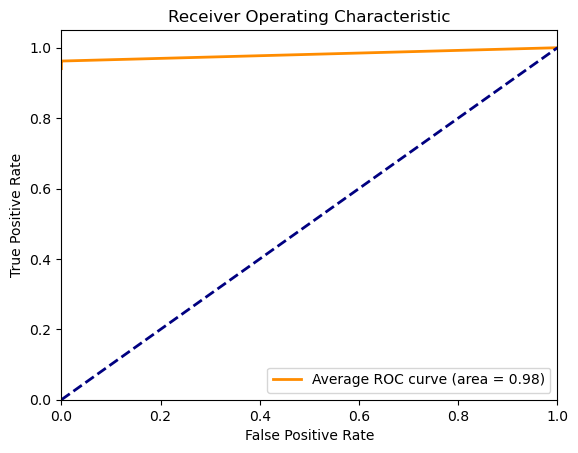

In [33]:
# Compute ROC curve and ROC area for each class
n_classes = y_val_bin.shape[1]
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_val_bin[:, i], y_val_pred_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot average ROC curve
plt.figure()
plt.plot(fpr["macro"], tpr["macro"], color='darkorange', lw=2, label='Average ROC curve (area = %0.2f)' % roc_auc["macro"])
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

plt.savefig('./output/lstm_transaction_features_only_3r.png')
plt.show()